In [126]:
#Find Correct Path
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/train.csv
/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/test.csv
/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/gender_submission.csv
/kaggle/input/datasets/redwankarimsony/heart-disease-data/heart_disease_uci.csv
/kaggle/input/datasets/devansodariya/student-performance-data/student_data.csv
/kaggle/input/datasets/organizations/uciml/pima-indians-diabetes-database/diabetes.csv


In [127]:
#we have to load the Titanic Dataset
import pandas as pd

titanic = pd.read_csv(
    '/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/train.csv'
)

titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
#  Now we have to Handle the  missing values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Drop unnecessary columns from the data set
titanic = titanic.drop(
    ['PassengerId','Name','Ticket','Cabin'],
    axis=1,
    errors='ignore'
)


In [129]:
#Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])


In [130]:
#Apply Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)

titanic_acc = accuracy_score(y_test, pred)

print("Titanic Accuracy:", titanic_acc)


Titanic Accuracy: 0.8100558659217877


In [131]:
# this is used when we want to know the name of the data sets in the notebook
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/train.csv
/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/test.csv
/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/gender_submission.csv
/kaggle/input/datasets/redwankarimsony/heart-disease-data/heart_disease_uci.csv
/kaggle/input/datasets/devansodariya/student-performance-data/student_data.csv
/kaggle/input/datasets/organizations/uciml/pima-indians-diabetes-database/diabetes.csv


In [132]:
#now we added the second data set in to the notebook we have to load it
diabetes = pd.read_csv('/kaggle/input/datasets/organizations/uciml/pima-indians-diabetes-database/diabetes.csv')
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
#Diabetes dataset is already numeric so no encoding needed.
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']


In [134]:
#Train SAME Algorithm that is previously used (Logistic Regression)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

diabetes_acc = accuracy_score(y_test, pred)

print("Diabetes Accuracy:", diabetes_acc)


Diabetes Accuracy: 0.7467532467532467


In [135]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/train.csv
/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/test.csv
/kaggle/input/datasets/kanchanpallysandeep/titanic-data-files/gender_submission.csv
/kaggle/input/datasets/redwankarimsony/heart-disease-data/heart_disease_uci.csv
/kaggle/input/datasets/devansodariya/student-performance-data/student_data.csv
/kaggle/input/datasets/organizations/uciml/pima-indians-diabetes-database/diabetes.csv


In [136]:
# LOAD THE HEART DISEASE DATASET
import pandas as pd

heart = pd.read_csv(
    '/kaggle/input/datasets/redwankarimsony/heart-disease-data/heart_disease_uci.csv'
)

heart.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [137]:
#check the columns names
heart.columns


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [138]:
#Convert All Text Columns
heart = pd.get_dummies(heart, drop_first=True)

In [139]:
#Convert target column
heart['num'] = (heart['num'] > 0).astype(int)

In [140]:
#Handle missing values
heart = heart.fillna(heart.median(numeric_only=True))

In [141]:
#Encode categorical columns
heart = pd.get_dummies(heart, drop_first=True)

In [142]:
#Define X and y
X = heart.drop('num', axis=1)
y = heart['num']

In [143]:
#Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [144]:
#Import Scaler
from sklearn.preprocessing import StandardScaler

In [145]:
#Create scalar
scaler = StandardScaler()

In [146]:
#Scale Training & Testing Data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
# increase iterations 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)

In [148]:
#Train the Model
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [149]:
#prediction
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
heart_acc = accuracy_score(y_test, pred)

print("Heart Disease Accuracy:", heart_acc)

Heart Disease Accuracy: 0.842391304347826


In [150]:
# now we have to create a final comparsion table
import pandas as pd

results = pd.DataFrame({
    "Dataset": ["Titanic", "Diabetes", "Heart Disease"],
    "Accuracy": [titanic_acc, diabetes_acc, heart_acc]
})

results.sort_values(by="Accuracy", ascending=False)

,Dataset,Accuracy
2,Heart Disease,0.842391
0,Titanic,0.810056
1,Diabetes,0.746753


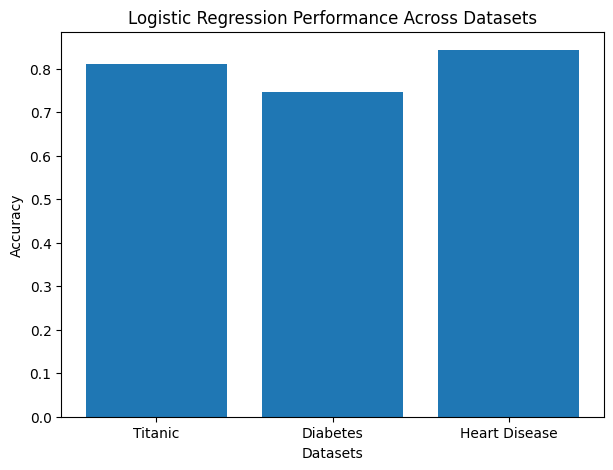

In [151]:
# now we have to visualize the 3 datasets
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(results["Dataset"], results["Accuracy"])
plt.title("Logistic Regression Performance Across Datasets")
plt.ylabel("Accuracy")
plt.xlabel("Datasets")
plt.show()

Conclusion:

* Logistic Regression was applied to multiple datasets including Titanic, Diabetes, and Heart Disease.

* The algorithm showed different accuracy values for each dataset.

* Medical datasets performed better due to strong numerical relationships between features.

* Social datasets like Titanic required more preprocessing and showed comparatively lower accuracy.

* This experiment proves that dataset characteristics influence algorithm performance.